In [1]:
from pathlib import Path
import requests as rq
from io import BytesIO
import math

import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from mlresearch.utils import set_matplotlib_style
set_matplotlib_style(42, **{"font.family":"Times"})
#set_matplotlib_style(16, **{"font.family":"Times"})

# Download data

## Data from 2013-2023

Rank: Rank

Institution: Name of institution

Count: Score

Faculty: Number of faculty members

In [2]:
directory = '../../Files/CSRankings/'
engineering_df = pd.read_csv(directory + 'CSRankings.txt', delimiter="\t")

area_df = pd.read_csv(directory + 'AI.txt', delimiter="\t")
engineering_df = engineering_df.merge(area_df, on="Institution", suffixes=(""," AI"), how="outer")

area_df = pd.read_csv(directory + 'Systems.txt', delimiter="\t")
engineering_df = engineering_df.merge(area_df, on="Institution", suffixes=(""," Systems"), how="outer")

area_df = pd.read_csv(directory + 'Theory.txt', delimiter="\t")
engineering_df = engineering_df.merge(area_df, on="Institution", suffixes=(""," Theory"), how="outer")

area_df = pd.read_csv(directory + 'Interdisciplinary.txt', delimiter="\t")
engineering_df = engineering_df.merge(area_df, on="Institution", suffixes=(""," Interdisciplinary"), how="outer")

# Remove scores, rank and Institution
# engineering_df.drop(columns='Institution', inplace=True)
# Fill NA with 1 (cause we take the product)
engineering_df = engineering_df.fillna(0)

# # Make and save dataframe to file
filepath = Path(directory + 'CSRankings_raw_data.csv')
engineering_df.to_csv(filepath)

original = engineering_df.copy()
# Drop columns that do not participate in the ranking
engineering_df.drop(columns=['Faculty', 'Faculty AI', 'Faculty Systems', 'Faculty Theory', 'Faculty Interdisciplinary'], inplace=True)
engineering_df.set_index('Institution', inplace=True)

engineering_df.head()

,Count,Score,Count AI,Count Systems,Count Theory,Count Interdisciplinary
Institution,,,,,,
Carnegie Mellon University,1,18.4,71.4,11.9,21.1,13.8
Univ. of Illinois at Urbana-Champaign,2,14.2,46.1,12.6,16.0,7.2
Univ. of California - San Diego,3,11.9,31.6,9.0,10.1,10.3
Massachusetts Institute of Technology,4,11.2,28.1,8.6,16.2,7.9
Georgia Institute of Technology,5,10.5,28.5,7.8,6.9,10.2


In [3]:
engineering_df.drop(columns=['Count','Score'], inplace=True)

In [4]:
def geometric_ranking(dataset, columns=None):
    new_df = pd.DataFrame(dataset).copy()
    if columns is not None:
        new_df.columns = columns
        
    count_score = []
    for index, row in new_df.iterrows():
        if row['Count AI'] > 1:
            ai = row['Count AI']**5+1
        else:
            ai = 1
        if row['Count Systems'] > 1:
            systems = row['Count Systems']**12+1
        else:
            systems = 1
        if row['Count Theory'] > 1:
            theory = row['Count Theory']**3+1
        else:
            theory = 1
        if row['Count Interdisciplinary'] > 1:
            inter = row['Count Interdisciplinary']**7+1
        else:
            inter = 1
        count_score.append((ai*systems*theory*inter)**(1/27))
    new_df['Score'] = count_score
    return new_df['Score'].values

original['My score'] = geometric_ranking(engineering_df)
original = original.sort_values('My score', ascending=False)
original['My Rank'] = range(1, len(original.index) + 1)

original.head(10)

,Count,Institution,Score,Faculty,Count AI,Faculty AI,Count Systems,Faculty Systems,Count Theory,Faculty Theory,Count Interdisciplinary,Faculty Interdisciplinary,My score,My Rank
0,1,Carnegie Mellon University,18.4,166,71.4,93.0,11.9,77.0,21.1,29.0,13.8,94.0,18.363977,1
1,2,Univ. of Illinois at Urbana-Champaign,14.2,116,46.1,66.0,12.6,70.0,16.0,20.0,7.2,51.0,14.230258,2
2,3,Univ. of California - San Diego,11.9,117,31.6,57.0,9.0,58.0,10.1,18.0,10.3,58.0,11.913021,3
3,4,Massachusetts Institute of Technology,11.2,95,28.1,65.0,8.6,49.0,16.2,24.0,7.9,39.0,11.238907,4
4,5,Georgia Institute of Technology,10.5,139,28.5,77.0,7.8,64.0,6.9,13.0,10.2,66.0,10.486860,5
5,6,Stanford University,10.3,69,36.7,54.0,5.4,32.0,13.3,19.0,11.5,39.0,10.354671,6
6,7,University of Michigan,10.1,99,30.4,53.0,9.0,49.0,9.3,15.0,5.9,43.0,10.143639,7
7,8,University of Washington,10.0,80,28.0,47.0,6.2,34.0,12.2,14.0,10.0,50.0,10.003249,8
8,9,Univ. of California - Berkeley,9.6,90,23.2,56.0,7.4,46.0,15.9,21.0,6.4,51.0,9.587284,9
9,10,Cornell University,9.5,83,42.0,48.0,5.7,38.0,12.8,16.0,6.8,43.0,9.449586,10


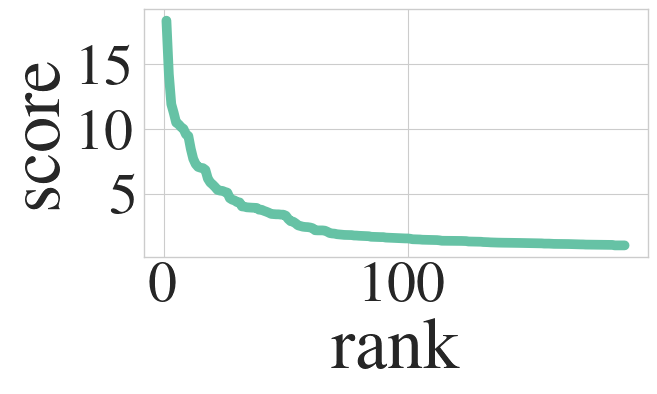

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(6, 3), sharey='row')
ax = sns.lineplot(data=original, x="My Rank", y="My score", linewidth = 7, c='#66c2a5')
ax.set_ylabel("score")
ax.set_xlabel("rank")

fig.savefig(
    "rank-vs-score-linechart-csrankings.pdf",
    format="pdf",
    bbox_inches="tight",
    transparent=True
)
plt.show()

In [6]:
engineering_df

,Count AI,Count Systems,Count Theory,Count Interdisciplinary
Institution,,,,
Carnegie Mellon University,71.4,11.9,21.1,13.8
Univ. of Illinois at Urbana-Champaign,46.1,12.6,16.0,7.2
Univ. of California - San Diego,31.6,9.0,10.1,10.3
Massachusetts Institute of Technology,28.1,8.6,16.2,7.9
Georgia Institute of Technology,28.5,7.8,6.9,10.2
...,...,...,...,...
University of Alabama - Huntsville,0.0,1.0,0.0,0.0
University of Louisville,0.0,1.0,0.0,1.1
University of Miami,0.0,1.1,0.0,1.1


# Run experiments

In [7]:
from sharp import ShaRP
from sharp.qoi import QOI_OBJECTS
from sharp.utils import scores_to_rank
from mlresearch.utils import parallel_loop

cols = engineering_df.columns
qoi_objs = [
    v
    for k, v 
    in QOI_OBJECTS.items() 
    if v._qoi_type == "rank"
]

In [7]:
def experiment(qoi):
    if qoi.__name__ == "TopKQoI":
        qoi_ = qoi(target_function=(lambda df: geometric_ranking(df, cols)), X=engineering_df, top_k=int(engineering_df.shape[0]*0.1))
    else:
        qoi_ = qoi(target_function=(lambda df: geometric_ranking(df, cols)), X=engineering_df)

    xai = ShaRP(qoi=qoi_, random_state=42)# , sample_size=2, replace=False)
    xai.fit(engineering_df)
    shapley_values = pd.DataFrame(xai.all(engineering_df), columns=engineering_df.columns, index=engineering_df.index)
    shapley_values["score"] = geometric_ranking(engineering_df)
    shapley_values["ranking"] = scores_to_rank(shapley_values["score"])
    shapley_values.to_csv(f"csrankings_{qoi.__name__.lower()}_shapley_values.csv")

parallel_loop(experiment, qoi_objs, n_jobs=-1, progress_bar=True, description="Running experiments")

Running experiments:   0%|          | 0/3 [00:00<?, ?it/s]

[None, None, None]

# Analysis of Ranks using Shapley values

In [8]:
buckets = 10

all_shapley = {}
for qoi in qoi_objs:
    qoi_name = qoi.__name__.lower()
    df = pd.read_csv(f"csrankings_{qoi_name}_shapley_values.csv", index_col="Institution")

    df['rank_bucket'] = [
        (
            str(math.floor((rank - 1) / (df.shape[0] / buckets)) * 10) 
            + "-\n" 
            + str(math.floor(((rank - 1) / (df.shape[0] / buckets)) + 1) * 10) 
            + "%" 
        )
        if math.floor((rank - 1) / (df.shape[0] / buckets)) != 0 
        else "<10%"
        for rank in df['ranking']
    ]

    df.columns = df.columns.str.replace("Count ", "").str.replace("Interdisciplinary", "Inter.")
    df["Rank Bucket"] = df["rank_bucket"].str.replace("%", "\%").str.replace("<", "$<$")
    df = (
        df
        .drop(columns=["rank_bucket", "ranking", "score"])
        .melt(id_vars=["Rank Bucket"])
        .rename(columns={"variable": "Feature", "value": "Contribution"})
    )

    
    all_shapley[qoi_name.replace("qoi", "")] = df

all_shapley.keys()

<>:21: SyntaxWarning: invalid escape sequence '\%'
<>:21: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_388551/321415903.py:21: SyntaxWarning: invalid escape sequence '\%'
  df["Rank Bucket"] = df["rank_bucket"].str.replace("%", "\%").str.replace("<", "$<$")


dict_keys(['ranking', 'rankingscore', 'topk'])

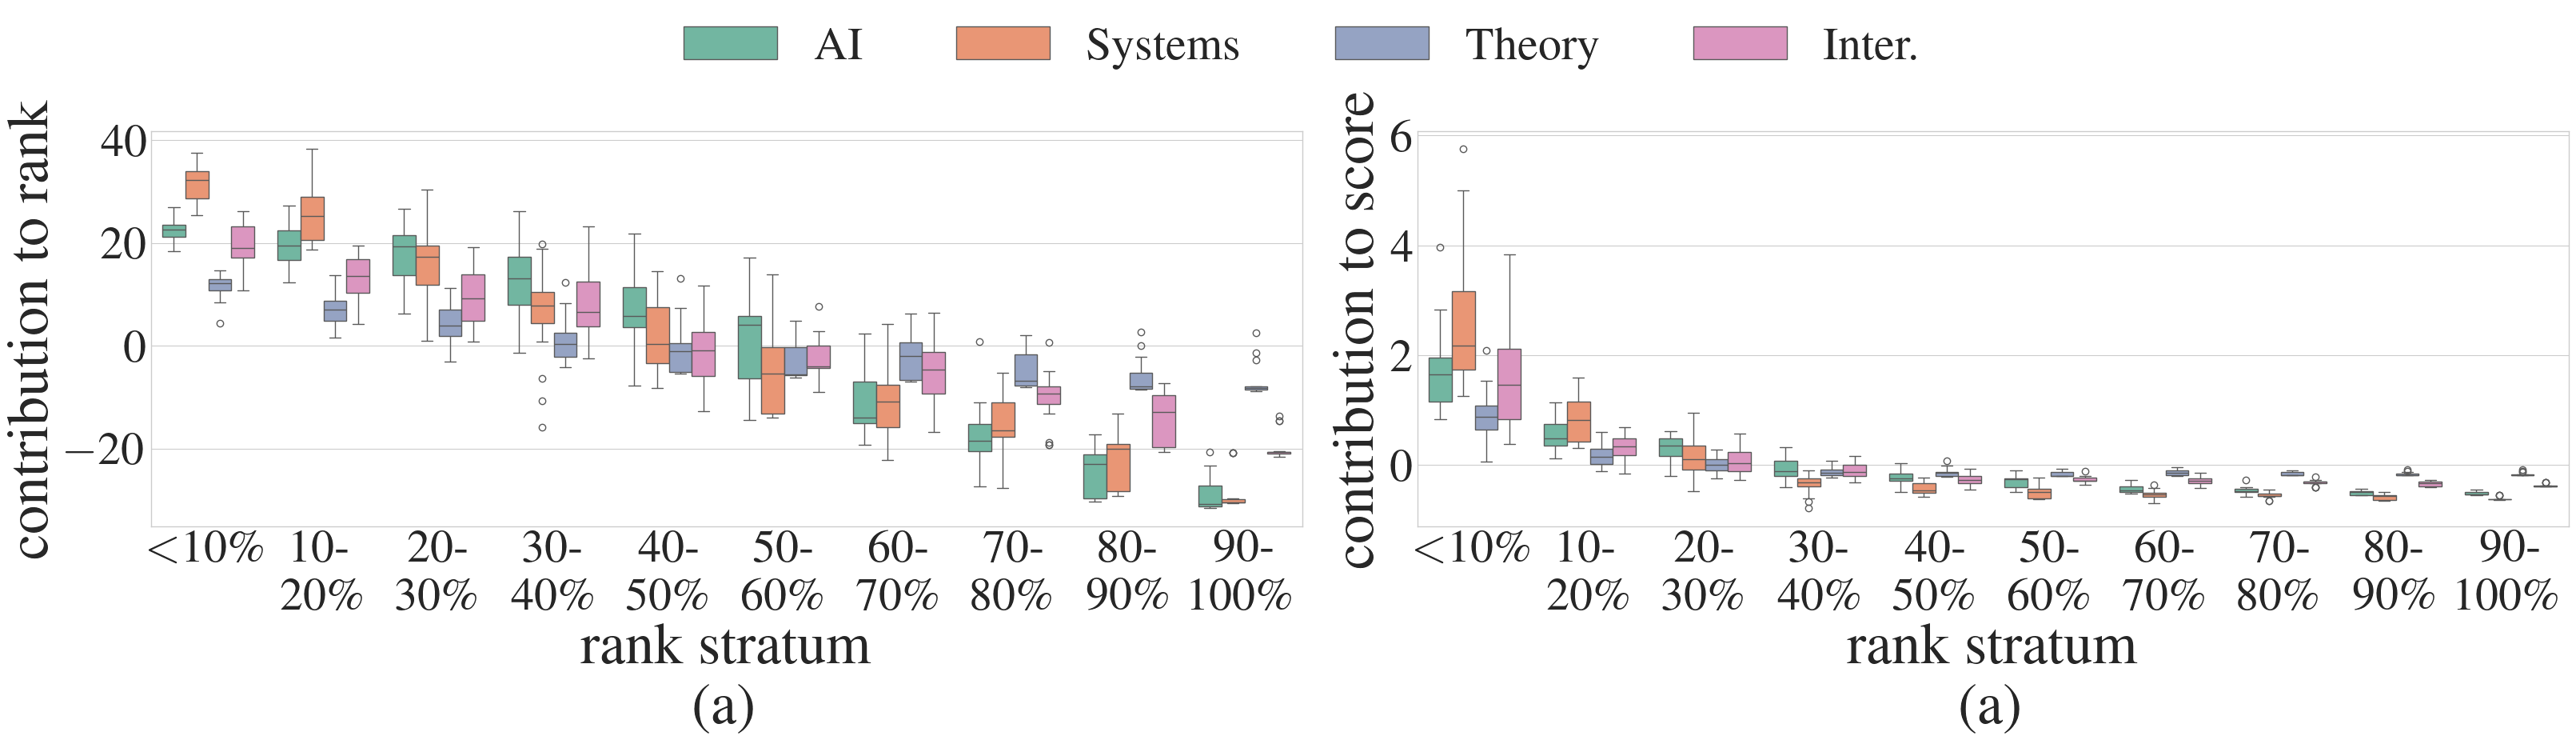

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(36, 6))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.1, hspace=None)

for i, (ax, qoi_) in enumerate(zip(axs.flatten(), ["ranking", "rankingscore"])):
    df = all_shapley[qoi_].copy()
    
    graph = sns.boxplot(
        x=df['Rank Bucket'], 
        y=df['Contribution'], 
        hue=df['Feature'], 
        palette="Set2", 
        ax=ax
    )
    if i == 0:
        sns.move_legend(
            graph, "lower center", bbox_to_anchor=(1, 1.05), ncol=4, title=None, frameon=False,
        )
    else:
        graph.get_legend().remove()
        
    plt.setp(graph.patches, linewidth=1)
    cont_to_ = "rank" if qoi_ == "ranking" else "score"
    ax.set_ylabel(f"contribution to {cont_to_}")
    graph.set_xlabel("rank stratum\n(a)")

plt.savefig(
    f"rankvsscore-csrankings.pdf",
    format="pdf",
    bbox_inches="tight",
)
plt.show()

In [10]:
# df = all_shapley["topk"].copy()
# all_shapley.keys()

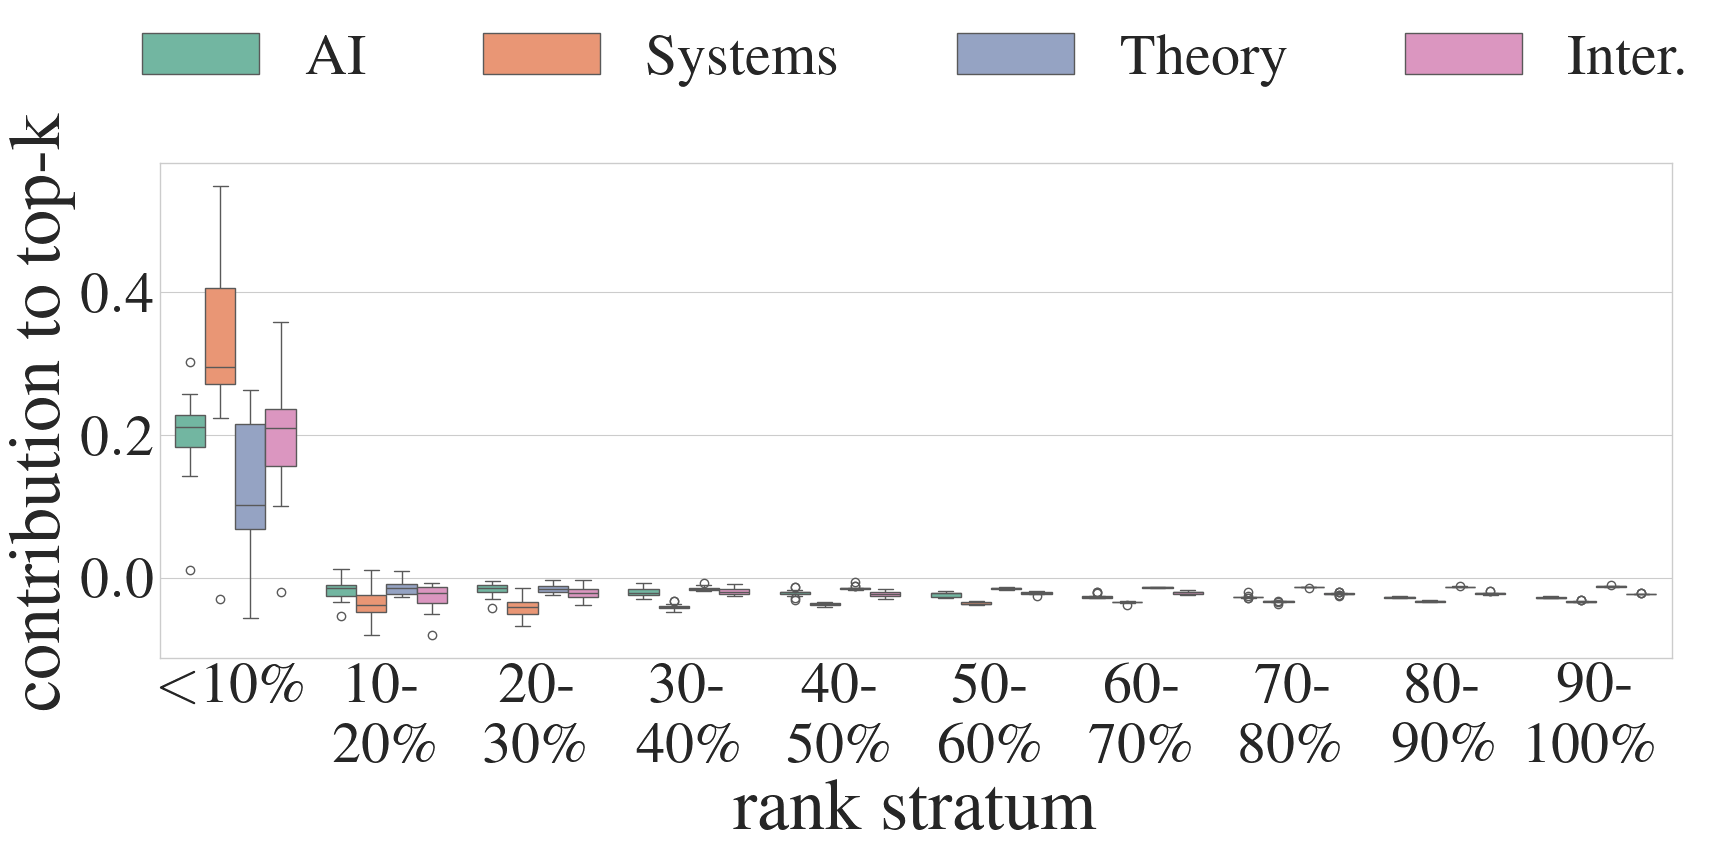

In [11]:
df = all_shapley["topk"].copy()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(18, 6), sharey='row')
graph = sns.boxplot(
    x=df['Rank Bucket'], 
    y=df['Contribution'], 
    hue=df['Feature'], 
    palette="Set2"
)
graph.set_ylabel("contribution to top-k")
graph.set_xlabel("rank stratum")
sns.move_legend(
    graph, "lower center", bbox_to_anchor=(.5, 1.05), ncol=4, title=None, frameon=False,
)

plt.savefig(
    f"contrs_topK.pdf",
    format="pdf",
    bbox_inches="tight",
)
plt.show()

# Individual

In [12]:
QOI_OBJECTS

{'diff': sharp.qoi._qoi.DiffQoI,
 'flip': sharp.qoi._qoi.FlipQoI,
 'likelihood': sharp.qoi._qoi.LikelihoodQoI,
 'ranking': sharp.qoi._qoi.RankingQoI,
 'ranking_score': sharp.qoi._qoi.RankingScoreQoI,
 'top_k': sharp.qoi._qoi.TopKQoI}

In [13]:
all_shapley["ranking"]["Contribution"]

0      24.179012
1      23.123016
2      22.537478
3      21.592593
4      22.621693
         ...    
751   -20.653880
752   -14.509700
753   -13.625220
754   -21.627866
755   -21.627866
Name: Contribution, Length: 756, dtype: float64

In [14]:
# mean shapley values is basically zero
mean_shapley = np.round(all_shapley["ranking"]["Contribution"].mean(), decimals=3)
print(mean_shapley)

cols = engineering_df.columns

df_renamed = engineering_df.copy()
df_renamed.columns = df_renamed.columns.str.replace("Count ", "").str.replace("Interdisciplinary", "Inter.")

qoi_ = QOI_OBJECTS["ranking"](
    target_function=(lambda df: geometric_ranking(df, cols)), X=df_renamed
)

xai = ShaRP(qoi=qoi_, random_state=42)
xai.fit(df_renamed)

-0.0


In [15]:
df_ = engineering_df.copy()
df_["score"] = geometric_ranking(df_)
df_["ranking"] = scores_to_rank(df_["score"])
df_.loc[
    ["University of South Carolina", "Wayne State University"]
]

,Count AI,Count Systems,Count Theory,Count Interdisciplinary,score,ranking
Institution,,,,,,
University of South Carolina,2.8,1.2,1.1,1.6,1.537881,99
Wayne State University,2.8,1.4,0.0,1.3,1.513724,101


In [16]:
df_.median().to_frame().T

,Count AI,Count Systems,Count Theory,Count Interdisciplinary,score,ranking
0,2.8,1.3,1.2,1.5,1.566766,95.0


/home/joaofonseca/miniconda3/envs/sharp/lib/python3.12/site-packages/sharp/visualization/_waterfall.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sval = values[order[i]]
/home/joaofonseca/miniconda3/envs/sharp/lib/python3.12/site-packages/sharp/visualization/_waterfall.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.issubdtype(type(features[order[i]]), np.number):
/home/joaofonseca/miniconda3/envs/sharp/lib/python3.12/site-packages/sharp/visualization/_waterfall.py:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

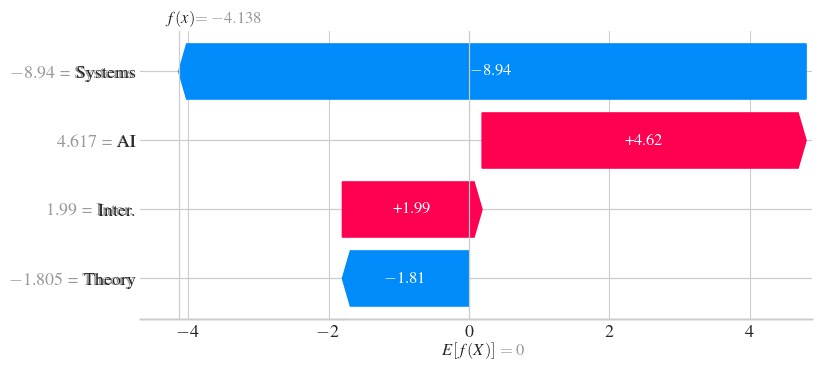

In [17]:
values = xai.individual(engineering_df.loc["University of South Carolina"].values)
xai.plot.waterfall(values)
plt.savefig(
    f"waterfall_USC.svg",
    format="svg",
    bbox_inches="tight",
)
plt.show()

/home/joaofonseca/miniconda3/envs/sharp/lib/python3.12/site-packages/sharp/visualization/_waterfall.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sval = values[order[i]]
/home/joaofonseca/miniconda3/envs/sharp/lib/python3.12/site-packages/sharp/visualization/_waterfall.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.issubdtype(type(features[order[i]]), np.number):
/home/joaofonseca/miniconda3/envs/sharp/lib/python3.12/site-packages/sharp/visualization/_waterfall.py:101: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

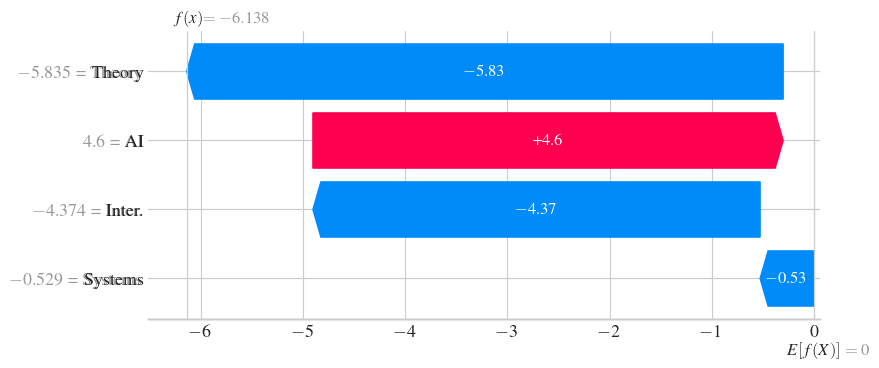

In [18]:
values = xai.individual(engineering_df.loc["Wayne State University"].values)
xai.plot.waterfall(values)
plt.savefig(
    f"waterfall_WSU.svg",
    format="svg",
    bbox_inches="tight",
)
plt.show()

# Pairwise

In [19]:
df_ = engineering_df.copy()
df_["score"] = geometric_ranking(df_)
df_["ranking"] = scores_to_rank(df_["score"])
df_.loc[
    ["Georgia Institute of Technology", "Stanford University", "University of Michigan"]
]

,Count AI,Count Systems,Count Theory,Count Interdisciplinary,score,ranking
Institution,,,,,,
Georgia Institute of Technology,28.5,7.8,6.9,10.2,10.486860,5
Stanford University,36.7,5.4,13.3,11.5,10.354671,6
University of Michigan,30.4,9.0,9.3,5.9,10.143639,7


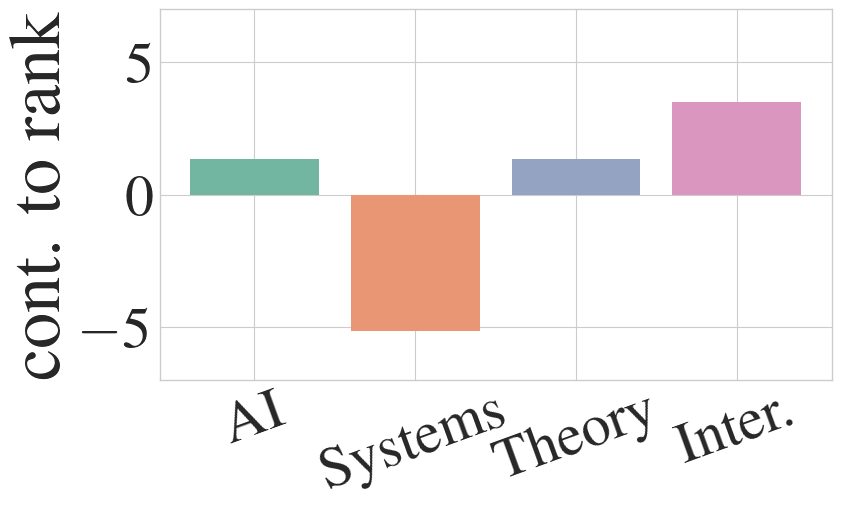

In [79]:
values = xai.pairwise(
    engineering_df.loc["Stanford University"].values, 
    engineering_df.loc["University of Michigan"].values,
)
fig, ax = plt.subplots(1, 1, figsize=(8,4.5))
xai.plot.bar(
    values, 
    ax=ax,
    color=["#72b6a1", "#e99675", "#95a3c3", "#db96c0"]
)
ax.set_ylabel("cont. to rank")
ax.set_xlabel("")
ax.set_ylim(bottom=-7, top=7)
plt.xticks(rotation=20)
plt.savefig(
    f"pairwise Stanford vs Michigan.pdf",
    format="pdf",
    bbox_inches="tight",
)
plt.show()

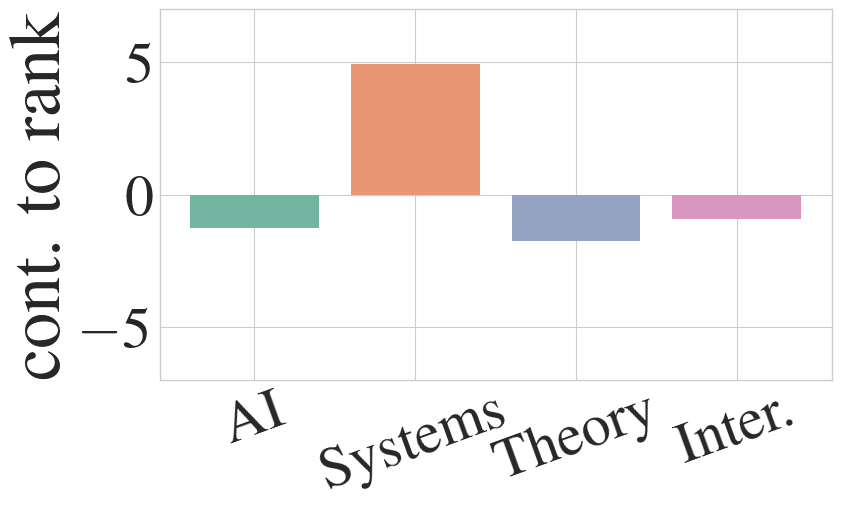

In [80]:
values = xai.pairwise(
    engineering_df.loc["Georgia Institute of Technology"].values,
    engineering_df.loc["Stanford University"].values
)
fig, ax = plt.subplots(1, 1, figsize=(8,4.5))
xai.plot.bar(
    values, 
    ax=ax,
    color=["#72b6a1", "#e99675", "#95a3c3", "#db96c0"]
)
ax.set_ylabel("cont. to rank")
ax.set_xlabel("")
ax.set_ylim(bottom=-7, top=7)
plt.xticks(rotation=20)
plt.savefig(
    f"pairwise_GeorgiaTechvs Stanford.pdf",
    format="pdf",
    bbox_inches="tight",
)
plt.show()